# Diabetes Prediction


## Importing required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Importing dataset

In [2]:
diabetes = pd.read_csv('diabetes.csv')

## Dimension of diabetes data

In [3]:
print(f"Dimension of diabetes data: {diabetes.shape}")

Dimension of diabetes data: (768, 9)


## Looking up top 5 rows of the dataset

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data without the lable

In [5]:
diabetes_without_outcome = diabetes.drop(columns=['Outcome'])
diabetes_without_outcome.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Familiarizing with Data


### Data Profiling

In [6]:
diabetes_without_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


### Correlation of columns

In [7]:
data_correlation = diabetes_without_outcome.corr()

In [8]:
data_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


## Heatmap for Data Correlation

<Axes: >

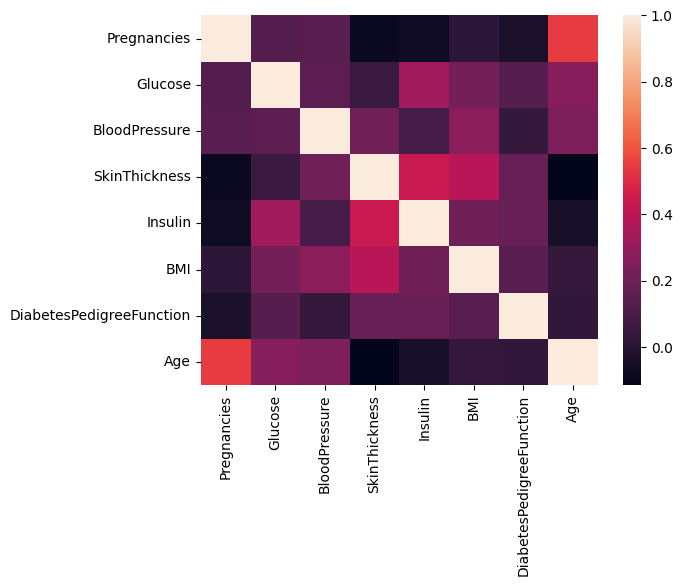

In [9]:
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

## Check number of Diagnosis which are diabetic and which non-diabetic

In [10]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

## Countplot on Outcome field to check Diabetic and Non-Diabetic People

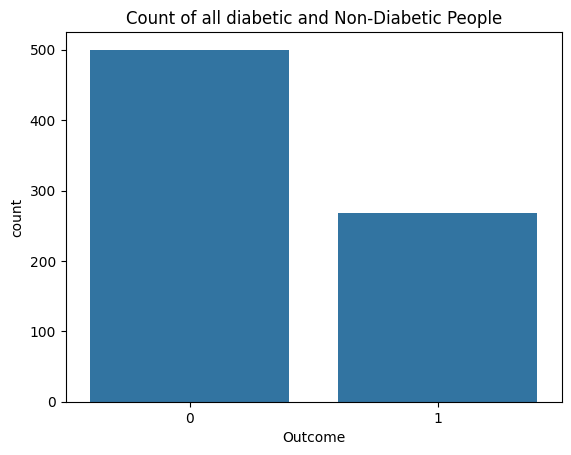

In [11]:
sns.countplot(x='Outcome',data = diabetes['Outcome'].to_frame(name='Outcome'))
plt.title('Count of all diabetic and Non-Diabetic People')
plt.show()

# Dividing data to traning and testing parts

In [12]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], test_size=0.3, random_state=80)

##  Using KNN classifier algorithm to check accuracy 

In [13]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

## Plotting the collected data points

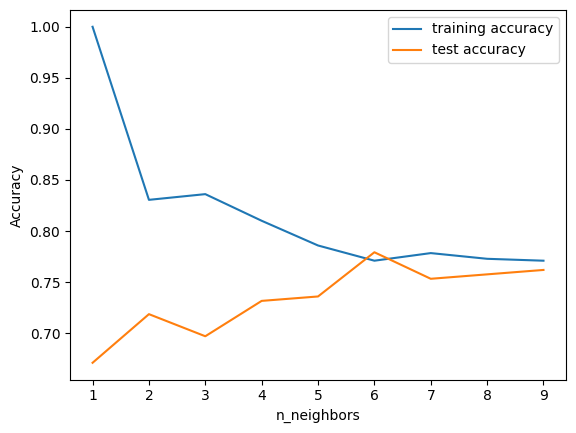

In [14]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

## Getting accuracy from KNN Algorithm

In [15]:
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, y_train):.2f}')
print(f'Accuracy of K-NN classifier on test set: {knn.score(X_test, y_test):.2f}')

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.76


## Using Logistic Regression Algorithm to check accuracy 

In [16]:
training_accuracy = []
test_accuracy = []
C = range(1, 8)

for C_Count in C:
    logreg100 = LogisticRegression(C=C_Count,max_iter=1000).fit(X_train, y_train)
    training_accuracy.append(logreg100.score(X_train, y_train))
    test_accuracy.append(logreg100.score(X_test, y_test))

## Plotting the collected data points

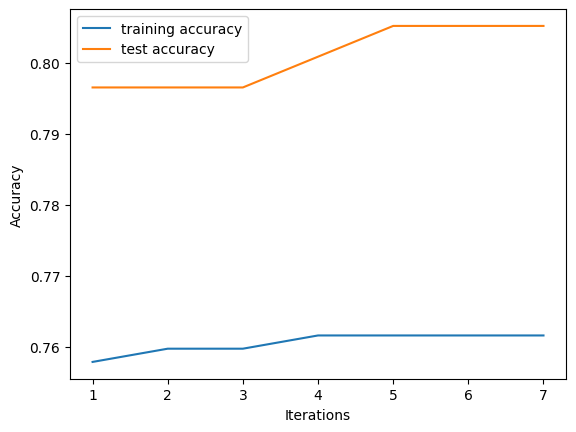

In [17]:
plt.plot(C, training_accuracy, label="training accuracy")
plt.plot(C, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")
plt.legend()
plt.savefig('Logistic regression model')

## Getting accuracy from Logistic Regression Algorithm

In [18]:
logreg100 = LogisticRegression(C=5,max_iter=1000).fit(X_train, y_train)
print(f"Training set accuracy: {logreg100.score(X_train, y_train):.2f}")
print(f"Test set accuracy: {logreg100.score(X_test, y_test):.2f}")

Training set accuracy: 0.76
Test set accuracy: 0.81


## Using Decision Tree Algorithm to check accuracy 

In [19]:
training_accuracy = []
test_accuracy = []
depth = range(1, 5)

for mx_dpt in depth:
    tree = DecisionTreeClassifier(max_depth=mx_dpt, random_state=0).fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

## Plotting the collected data points

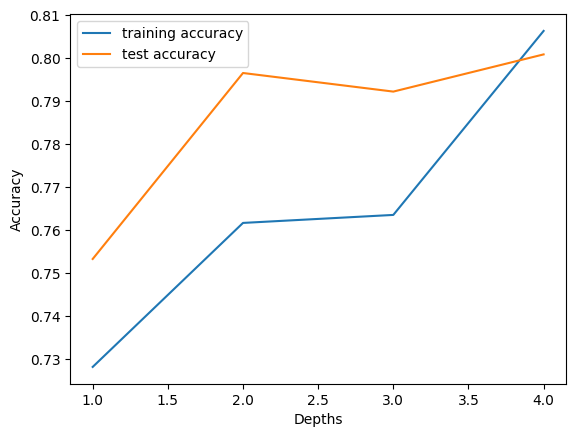

In [20]:
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Depths")
plt.legend()
plt.savefig('Decision Tree model')

## Getting accuracy from Decision Tree Algorithm

In [21]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.2f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.2f}")

Accuracy on training set: 0.81
Accuracy on test set: 0.80


## Getting accuracy from SVC Algorithm

In [22]:
svc = SVC().fit(X_train, y_train)
print(f"Accuracy on training set: {svc.score(X_train, y_train):.2f}".format())
print(f"Accuracy on test set: {svc.score(X_test, y_test):.2f}")

Accuracy on training set: 0.76
Accuracy on test set: 0.76
